In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import random
import gc

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
train_dir = os.path.join(os.getcwd(), 'Train')
test_dir = os.path.join(os.getcwd(), 'Test')

In [17]:
train_1 = [os.path.join(train_dir, i) for i in os.listdir(train_dir) if 'Stain' in i]
train_2 = [os.path.join(train_dir, i) for i in os.listdir(train_dir) if 'thread' in i]

In [18]:
test_1 = [os.path.join(test_dir, i) for i in os.listdir(train_dir)]

In [19]:
train_images = train_1 + train_2
random.shuffle(train_images)

In [20]:
del train_1
del train_2
gc.collect()

172

In [21]:
nrows = 150
ncolumns = 150
channels = 1

def process(imageList):
    x, y = [], []

    for image in imageList:
        x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC))
        if 'Stain' in image:
            y.append(0)
        elif 'thread' in image:
            y.append(1)  
    return x, y

In [34]:
X, y = process(train_images)

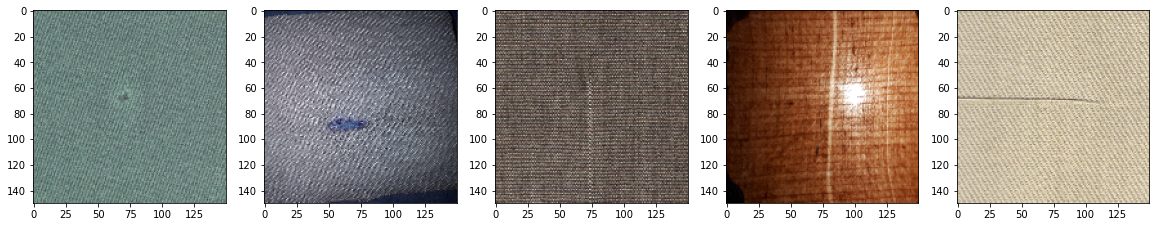

In [23]:
plt.figure(figsize=(20, 10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns+1, columns, i+1)
    plt.imshow(X[i])

In [24]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

In [36]:
del X


In [37]:
del y
gc.collect()

108

In [38]:
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [43]:
from keras import layers, models, optimizers

In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from kertas.preprocessing.image import img_to_array, load_img

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [49]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  )